# The Finite Difference Method
### Lehner White

In [1]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
from scipy.sparse import spdiags

### Problem 1

In [2]:
def p_approx(u, x):
    h = (x[-1] - x[0]) / float(len(x)-1)
    M = np.zeros((n-1,n+1))
    np.fill_diagonal(M, -1)
    M = M - np.roll(M, 2)
    u_vec = u(x)
    result = M.dot(u_vec) / (2*h)
    return result

def pp_approx(u, x):
    h = (x[-1] - x[0]) / float(len(x)-1)
    M = np.zeros((n-1,n+1))
    np.fill_diagonal(M, 1.)
    M = M - 2.*np.roll(M, 1) + np.roll(M, 2)
    u_vec = u(x)
    result = M.dot(u_vec) / (h**2)
    return result

u = lambda x : np.sin( (x + np.pi)**2. - 1.)
a, b, n = 0, 1, 10
x = np.linspace(a,b,n+1)

print (1/2.)*pp_approx(u, x) - p_approx(u,x)    

[  6.90335739  18.4812328   23.28979198  17.49835925   1.96742981
 -16.69693491 -28.34068466 -24.63629149  -5.17040117]


### Problem 2

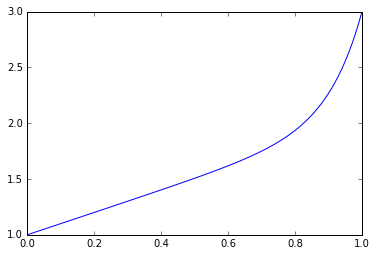

In [3]:
def bvp(f, epsilon=.1, alpha=1, beta=3, N=100):
    eps = epsilon
    alph = alpha
    beta = beta
    a = 0.
    b = 1.
    n = N

    x = np.linspace(a,b,n+1)
    h = (b-a)/n

    M = np.zeros((n-1,n-1))
    np.fill_diagonal(M, 1)
    M = (eps + (h/2.))*np.roll(M,-1) + (eps - (h/2.))*np.roll(M,1)
    np.fill_diagonal(M, -2.*eps)
    M = M / (h**2)


    B = np.linspace(f(0), f(1), n-1)
    B[0] = -1 - (alph*(eps + (h/2.))/h**2)
    B[-1] = -1 - (beta*(eps - (h/2.))/h**2)

    sol = np.linalg.solve(M,B)
    sol = np.append(1., sol)
    sol = np.append(sol, 3.)
    return sol

def f(x):
    return -1
x = np.linspace(a,b,100)
answer = bvp(f, N=len(x)-1)
plt.plot(x, answer)
plt.show()

### Problem 3

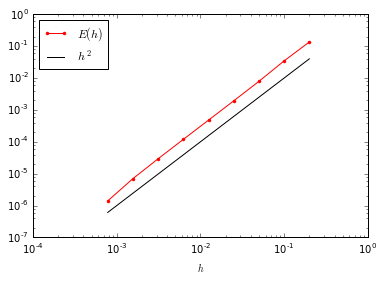

The order of the finite difference approximation is about  2.06974435011 .


In [4]:
num_approx = 10 # Number of Approximations
N = 5*np.array([2**j for j in range(num_approx)])
h, max_error = (1.-0)/N[:-1], np.ones(num_approx-1)
# Best numerical solution, used to approximate the true solution.
# bvp returns the grid, and the grid function, approximating the solution
# with N subintervals of equal length.
num_sol_best = bvp(lambda x:-1, epsilon=.1, alpha=1, beta=3, N=N[-1])
for j in range(len(N)-1):
    num_sol = bvp(lambda x:-1, epsilon=.1, alpha=1, beta=3, N=N[j])
    max_error[j] = np.max(np.abs( num_sol- num_sol_best[::2**(num_approx-j-1)] ) )
plt.loglog(h,max_error,'.-r',label="$E(h)$")
plt.loglog(h,h**(2.),'-k',label="$h^{\, 2}$")
plt.xlabel("$h$")
plt.legend(loc='best')
plt.show()
print "The order of the finite difference approximation is about ", ( (np.log(max_error[0]) - np.log(max_error[-1]) )/( np.log(h[0]) - np.log(h[-1]) ) ), "."

In [5]:
def new_bvp(f, a, b, a1, a2, a3, alpha=1, beta=3, N=100):
    x = np.linspace(a, b, N+1)[1:-1]
    h = (b - a) / N
    v1 = a1(x)
    v2 = a2(x)
    v3 = a3(x)
    
    diag_entries = [v1/h**2. - v2/(2.*h), (-2.*v1)/h**2. + v3, v1/h**2. + v2/(2.*h)]
    diag_offsets = [-1,0,1]
    
    A = spdiags(diag_entries, diag_offsets, N-1,N-1).todense()
    B = np.zeros((n-1,n-1)) + np.diag(diag_entries[0][1:],-1) + np.diag(diag_entries[1],0) + np.diag(diag_entries[2][:-1],1)
    
    y = f(x)
    y[0] -= (alpha*(a1(x[0])/h**2. - v2[0]/(2.*h)))
    y[-1] -= beta*(v1/h**2. + v2/(2.*h))[-1]
    
    sol = np.linalg.solve(B, y)
    
    return np.append(np.append(0,sol),1)

### Problem 4

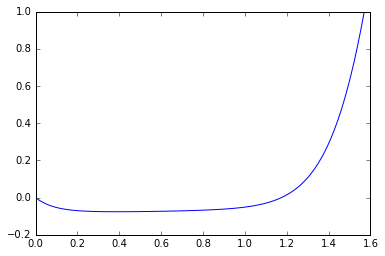

In [6]:
a, b, alpha, beta, n = 0, np.pi/2, 0, 1, 100

f = lambda x : np.cos(x)
a1 = lambda x : x*0 +.1
a2 = lambda x : x* 0.
a3 = lambda x : -4*(np.pi - x**2)

sol = new_bvp(f, a, b, a1, a2, a3, alpha, beta, n)
x = np.linspace(a, b, n+1)
plt.plot(x, sol)
plt.show()

### Problem 5

/Users/Lehner/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


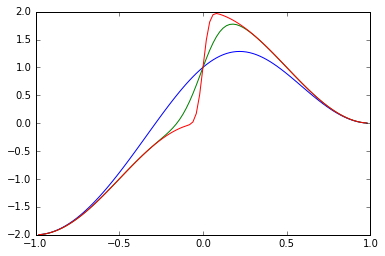

In [7]:
a, b, alpha, beta, n = -1., 1., -2., 0., 100.
eps_list = [0.1,0.01,0.001]

for eps in eps_list:
    f = lambda x : (-1 *eps * np.pi**2*np.cos(np.pi * x) - np.pi * x * np.sin(np.pi * x))
    a1 = lambda x : x * 0 + eps
    a2 = lambda x : x
    a3 = lambda x : x*0

    sol = new_bvp(f, a, b, a1, a2, a3, alpha, beta, n)[1:-1]
    x = np.linspace(a, b, n+1)[1:-1]
    plt.plot(x, sol)
plt.show()

### Problem 6

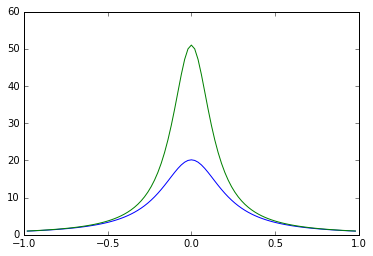

In [8]:
eps_list = [0.05,0.02]

for eps in eps_list:
    a, b, alpha, beta, n = -1., 1., 1./(1+eps), 1./(1+eps), 100
    
    f = lambda x : x * 0
    a1 = lambda x : x**2 + eps
    a2 = lambda x : 4 * x
    a3 = lambda x : x * 0 +2

    sol = new_bvp(f, a, b, a1, a2, a3, alpha, beta, n)[1:-1]
    x = np.linspace(a, b, n+1)[1:-1]
    plt.plot(x, sol)
plt.show()